In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from trainer import MinimaxTrainer
from tqdm import tqdm

In [2]:
def plot_rewards(rewards, title, window_size=10):
    """
    Grafica la recompensa por episodio y su media móvil.
    
    :param rewards: Lista de recompensas obtenidas en cada episodio.
    :param window_size: Tamaño de la ventana para el promedio móvil.
    """
    episodes = np.arange(len(rewards))
    
    # Cálculo del promedio móvil
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    
    plt.figure(figsize=(10, 5))
    plt.plot(episodes, rewards, label='Recompensa por episodio', alpha=0.5)
    plt.plot(episodes[:len(smoothed_rewards)], smoothed_rewards, label=f'Promedio móvil (window={window_size})', color='red', linewidth=2)
    
    plt.xlabel('Episodios')
    plt.ylabel('Recompensa')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
def plot_cost_and_power(power, cost, title):
    """
    Plots power and cost over time with dual y-axes.
    
    Parameters:
        time (list or array): Time series data
        power (list or array): Power values corresponding to the time series
        cost (list or array): Cost values corresponding to the time series
    """
    fig, ax1 = plt.subplots(figsize=(9, 5))
    
    # Plot Power on primary y-axis
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Power (kW)', color='tab:blue')
    ax1.plot( power, color='tab:blue', label='Power', linewidth=2)
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_ylim(0,10)
    
    # Create secondary y-axis for Cost
    ax2 = ax1.twinx()
    ax2.set_ylabel('Cost ($)', color='tab:red')
    ax2.plot(cost, color='tab:red', linestyle='dashed', label='Cost', linewidth=2)
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.set_ylim(0,100)
    
    fig.tight_layout()  # Ensures layout fits well
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

In [8]:
agent1_actions = np.array([-0.2, 0, 0.2])
agent2_actions =  np.array([-2, 0, 2])

agent1_states = np.round(np.linspace(0, 10, 51),2) # espacio de potencias discreto de 0-10
agent2_states = np.round(np.linspace(0, 10, 51),2)# espacio de precios discretos de 0 - 100

steps = 20000
decay = 10**(np.log10(0.01)/steps)
gamma=0.9
epsilon=0.2 
alpha=1

agent1_parameters = {
    'name': 'A',
    'actions': agent1_actions,
    'opponent_actions': agent2_actions,
    'states': agent1_states,
    'opponent_states': agent2_states,
    'epsilon': epsilon,
    'gamma': gamma,
    'epsilon': epsilon,
    'alpha': alpha,
    'decay': decay,
    'rol': 'generator'
}

agent2_parameters = {
    'name': 'B',
    'actions':  np.array([-0.2, 0, 0.2]),
    'opponent_actions': agent1_actions,
    'states': agent2_states,
    'opponent_states': agent1_states,
    'epsilon': epsilon,
    'gamma': gamma,
    'epsilon': epsilon,
    'alpha': alpha,
    'decay': decay,
    'rol': 'consumer'
}

init_generator_state = 9.8
init_consumer_state = 2




In [5]:
from agents import MiniMaxQAgent
from enviroment import P2PEnergyMarketEnv


market_env = P2PEnergyMarketEnv(a = 0.089, b = 52, c = 0)
agent1 = MiniMaxQAgent(agent_parameters=agent1_parameters)
agent1.state = (init_generator_state, init_consumer_state)

market_env.step(agent1,(-0.2, 2))

((9.6, 4), -5.964815371772273)

In [6]:
market_env2 = P2PEnergyMarketEnv(a = 0.089, b = 52, c = 0)
agent2 = MiniMaxQAgent(agent_parameters=agent2_parameters)
agent2.state = (90, 0.4)

market_env2.step(agent2,(0, 0))

((90, 0.4), 0.08867489652961238)

In [10]:
init_generator_state2 = 0.4
init_consumer_state2 = 9
trainerMR2 = MinimaxTrainer(agent1_parameters=agent2_parameters, agent2_parameters=agent1_parameters)
hist_reward_MR2, MR_policy2 = trainerMR2.trainMR(init_consumer_state2,init_generator_state2, steps)

Progreso: 100%|██████████| 20000/20000 [00:15<00:00, 1266.02step/s]


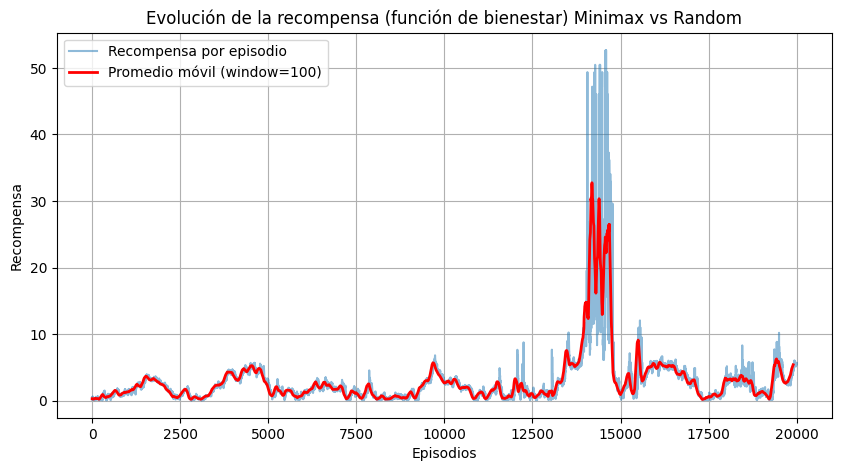

In [11]:
title = 'Evolución de la recompensa (función de bienestar) Minimax vs Random'
plot_rewards(hist_reward_MR2,title, window_size=100)

In [ ]:
trainerMR = MinimaxTrainer(agent1_parameters, agent2_parameters)
hist_reward_MR, MR_policy = trainerMR.trainMR(init_generator_state, init_consumer_state, steps)

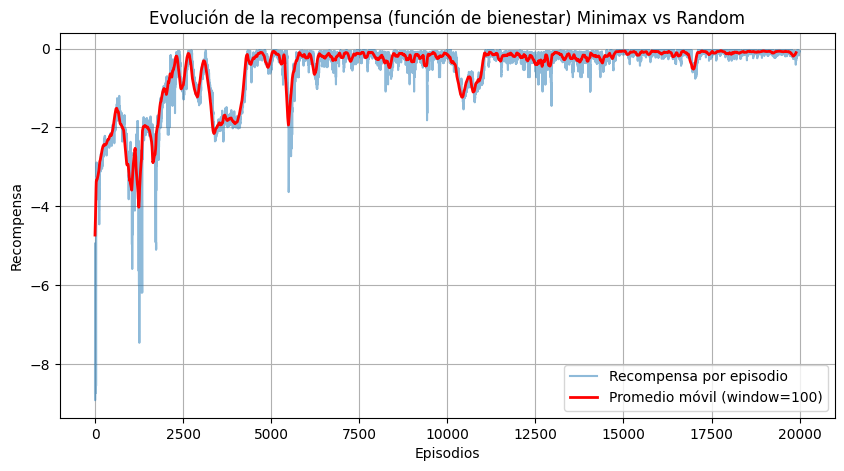

In [6]:
title = 'Evolución de la recompensa (función de bienestar) Minimax vs Random'
plot_rewards(hist_reward_MR,title, window_size=100)

Progreso: 100%|██████████| 5000/5000 [00:00<00:00, 8276.03step/s]


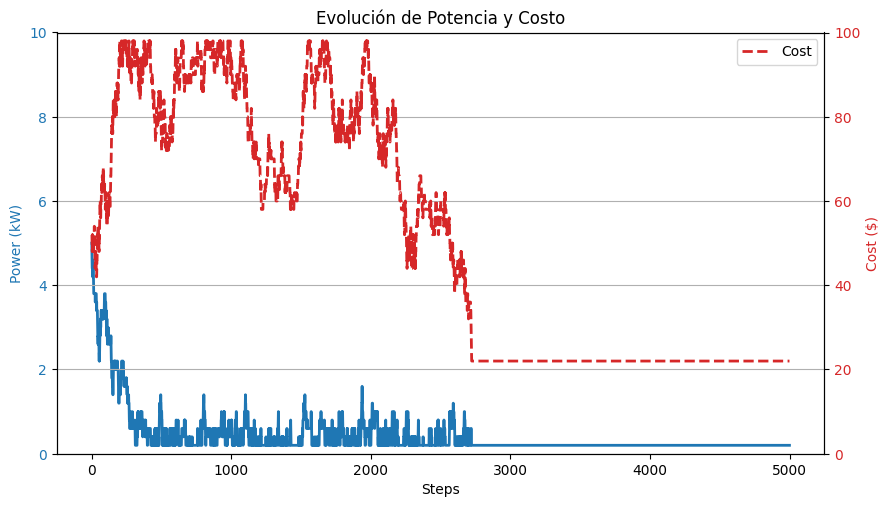

In [7]:
power, cost = trainerMR.evaluate(5, 50, MR_policy, 'random', 5000)
title = 'Evolución de Potencia y Costo'
plot_cost_and_power(power, cost, title)

Progreso: 100%|██████████| 5000/5000 [00:00<00:00, 7290.53step/s]


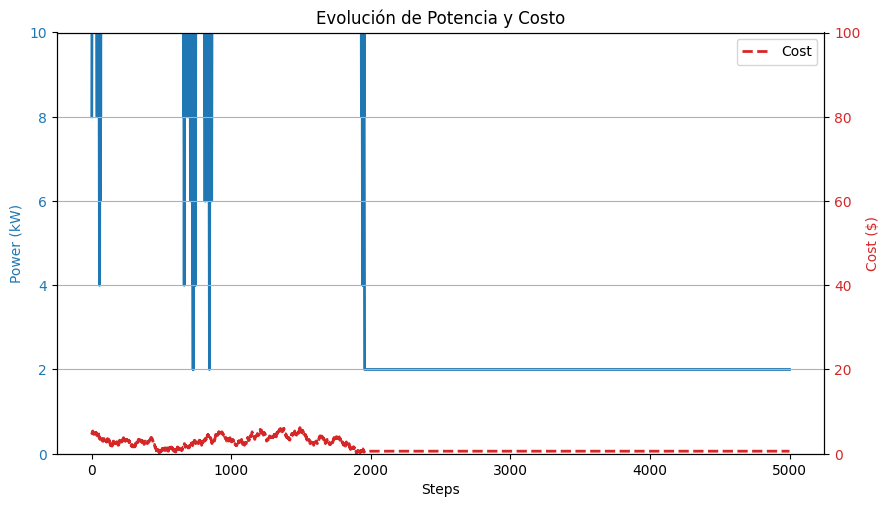

In [11]:
power, cost = trainerMR2.evaluate(8, 5, MR_policy2, 'random', 5000)
title = 'Evolución de Potencia y Costo'
plot_cost_and_power(power, cost, title)

In [11]:
trainerMM = MinimaxTrainer(agent1_parameters, agent2_parameters)
hist_reward_MM1, hist_reward_MM2, MM_policy1, MM_policy2 = trainerMM.trainMM(init_generator_state, init_consumer_state, steps)


Progreso: 100%|██████████| 20000/20000 [00:31<00:00, 636.02step/s]


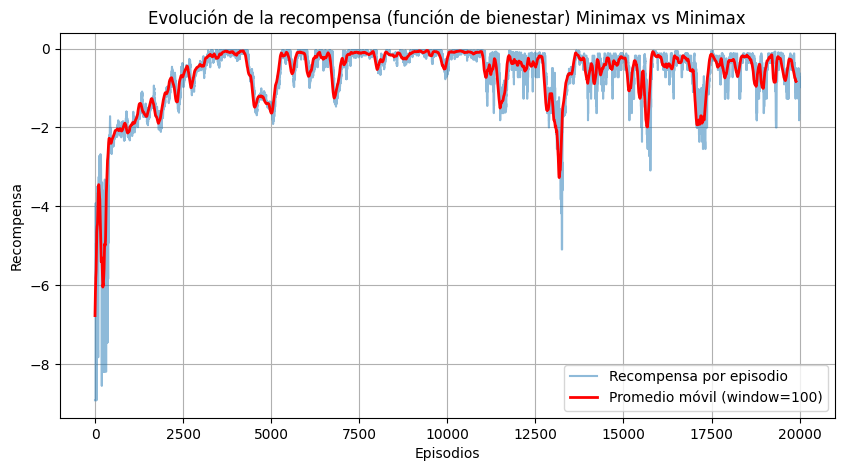

In [12]:
title = 'Evolución de la recompensa (función de bienestar) Minimax vs Minimax'
plot_rewards(hist_reward_MM1,title, window_size=100)

Progreso: 100%|██████████| 2000/2000 [00:00<00:00, 4732.63step/s]


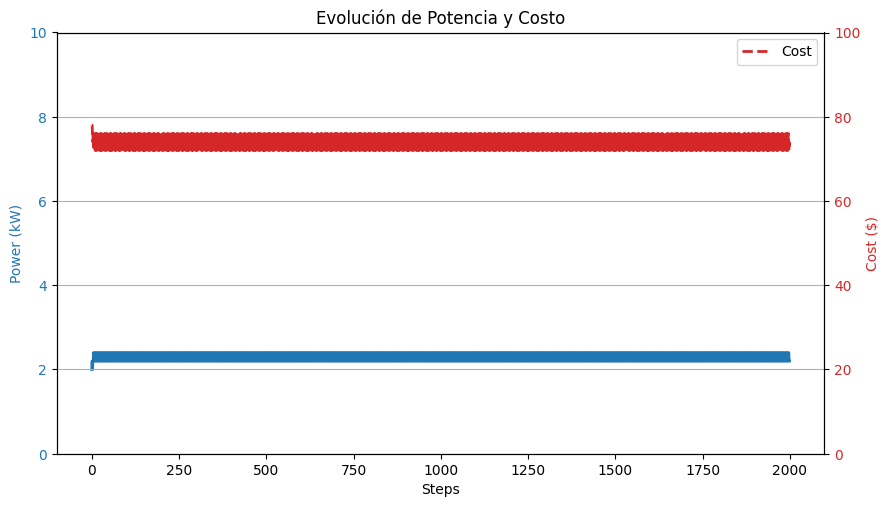

In [13]:
power, cost = trainerMM.evaluate(2, 80, MM_policy1, MM_policy2, 2000)
title = 'Evolución de Potencia y Costo'
plot_cost_and_power(power, cost, title)

In [14]:
trainerMRC = MinimaxTrainer(agent1_parameters, agent2_parameters)
hist_reward_MRC1, MRC_policy1= trainerMRC.trainMC(init_generator_state, init_consumer_state, MM_policy2, steps)

Progreso: 100%|██████████| 20000/20000 [00:17<00:00, 1168.24step/s]


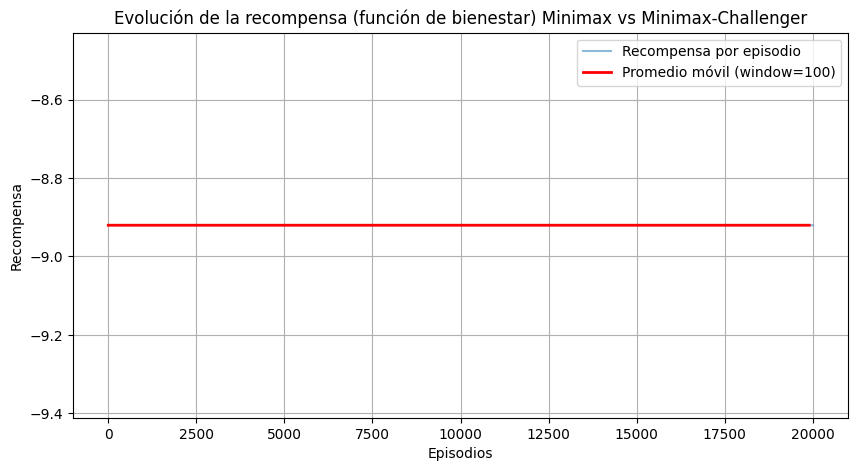

In [15]:
title = 'Evolución de la recompensa (función de bienestar) Minimax vs Minimax-Challenger'
plot_rewards(hist_reward_MRC1,title, window_size=100)

Progreso: 100%|██████████| 5000/5000 [00:00<00:00, 5490.22step/s]


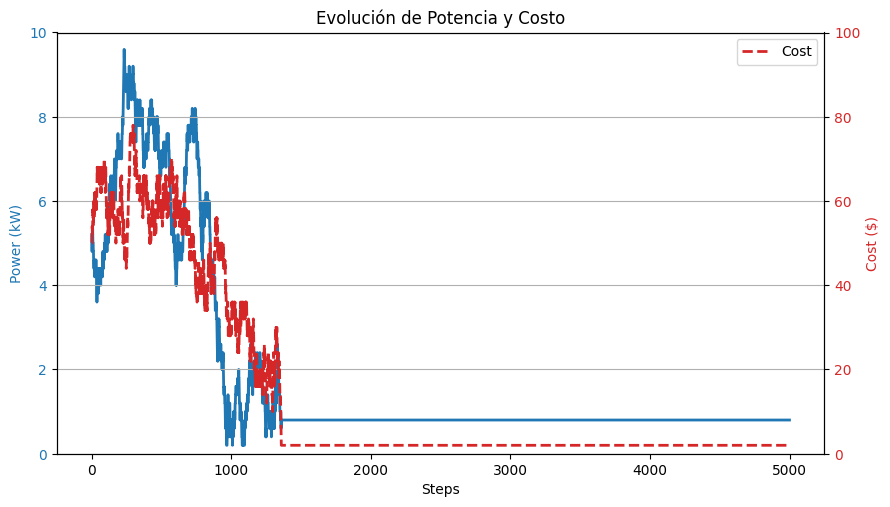

In [16]:
power, cost = trainerMRC.evaluate(5, 50, MRC_policy1, MM_policy2, 5000)
title = 'Evolución de la potencia intercambiada en 1000 iteraciones'
title = 'Evolución de Potencia y Costo'
plot_cost_and_power(power, cost, title)